# Logistic Regression

Logistic Regression is a widely used statistical method for binary classification problems. It is used to model the probability that a given input belongs to a particular category. Unlike linear regression, which predicts continuous outcomes, logistic regression predicts the probability of a binary outcome (0 or 1).

### Key Concepts

1. **Odds and Log-Odds**:
   - **Odds**: The odds of an event is the ratio of the probability of the event occurring to the probability of it not occurring.
     $$
     \text{Odds} = \frac{p}{1 - p}
     $$
   - **Log-Odds (Logit)**: The log-odds is the natural logarithm of the odds.
     $$
     \text{Logit}(p) = \ln \left( \frac{p}{1 - p} \right)
     $$

2. **Logistic Function**:
   The logistic function (also known as the sigmoid function) is used to map predicted values to probabilities.
   $$
   \sigma(z) = \frac{1}{1 + e^{-z}}
   $$
   where \( z = \beta_0 + \beta_1X_1 + \beta_2X_2 + \ldots + \beta_nX_n \)

3. **Probability Prediction**:
   The predicted probability for an input \( X \) is given by:
   $$
   \hat{p} = \sigma(z) = \frac{1}{1 + e^{-z}}
   $$

### Loss Function

The loss function for logistic regression, also known as the binary cross-entropy loss or log loss, measures the performance of the classification model whose output is a probability value between 0 and 1. The formula for the loss function is:
$$
\text{Loss}(\hat{y}, y) = - \left( y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right)
$$

where:
- \( \hat{y} \) is the predicted probability.
- \( y \) is the actual binary label (0 or 1).

Logistic regression models are trained by finding the coefficients (\( \beta \)) that minimize this loss function over the training data.

### Conclusion

Logistic Regression is a powerful and interpretable method for binary classification, making it a foundational tool in the field of statistics and machine learning. By modeling the log-odds of the probabilities, it provides a clear understanding of how input variables are associated with the probability of the outcome.


In [41]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

# generate some data (weight -> obsese)
np.random.seed(42)
data = pd.DataFrame(np.random.randint(0, 2, size = 100, dtype = 'int'), columns = ['Obsesity'])

data['Weight'] = data.Obsesity.apply(lambda x: np.random.randint(90, 120) if x  == 1 else np.random.randint(70, 89))
data.head()

,Obsesity,Weight
0,0,87
1,1,115
2,0,81
3,0,71
4,0,79


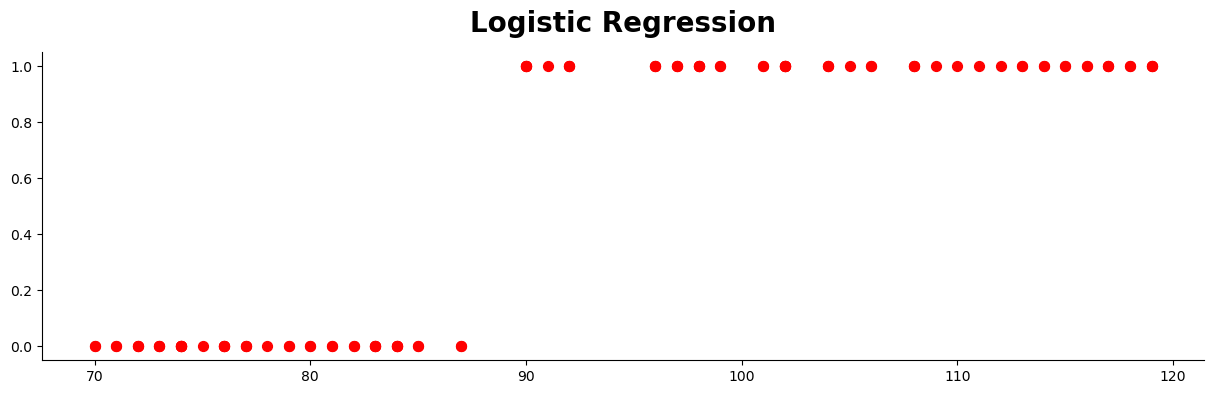

In [167]:
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 4))
plt.scatter(data.Weight, data.Obsesity, s = 50, c = 'red')
plt.title('Logistic Regression', fontsize = 20, fontweight = 'bold', y = 1.04)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [66]:
from sklearn.model_selection import train_test_split

# splitting data
x = np.array(data.Weight)
y =  np.array(data.Obsesity)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 0)

In [67]:
m = LogisticRegression()  

In [75]:
# reshape for 2d data
x_train = x_train.reshape(67, 1)
y_train = y_train.reshape(67, 1)

In [76]:
x_train.shape, y_train.shape

((67, 1), (67, 1))

In [77]:
m.fit(x_train, y_train)

/Users/nathan/anaconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [79]:
# actual slope and intercept
m.coef_, m.intercept_

(array([[1.20744162]]), array([-106.74360343]))

In [168]:
# adding results to a Dataframe
data_predict = pd.DataFrame(m.predict(x_test.reshape(33, 1)), columns = ['Predict'])
data_predict['True_Values'] = y_test
data_predict.head()

In [169]:
# verify the loss
lst_grade = []

for _, row in data_predict.iterrows():
    if row.Predict == row.True_Values:
        lst_grade.append(1)
        
assert sum(lst_grade) == data_predict.shape[0]   # both column are same

<div style="text-align: center; font-size: 150%;">
\[
\text{Loss}(\hat{y}, y) = - (\hat{y} \log(y) + (1 - y) \log(1 - \hat{y}))
\]
</div>

In [166]:
# sigmoïd Fonction 
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [157]:
data_predict['Probabilities'] = sigmoid(m.coef_ * x_test + m.intercept_)[0]

In [160]:
def loss_function(y_theta, y):
    return - (y_theta * np.log(y) + (1 - y) * np.log(1 - y_theta))

In [162]:
data_loss = data_predict[data_predict.True_Values == 1]

lst_sum =[]

for _, row in data_loss.iterrows():
    loss_num = loss_function(row.Probabilities, row.True_Values)
    lst_sum.append(loss_num)

In [165]:
np.sum(lst_sum)  # losses

0.0

## Somes Predictions

In [95]:
# exemple of random weight
m.predict([[80]])

array([0])

In [113]:
# exemple of probability to be in class 1
sigmoid(m.coef_ * 95 + m.intercept_)

array([[0.99965214]])

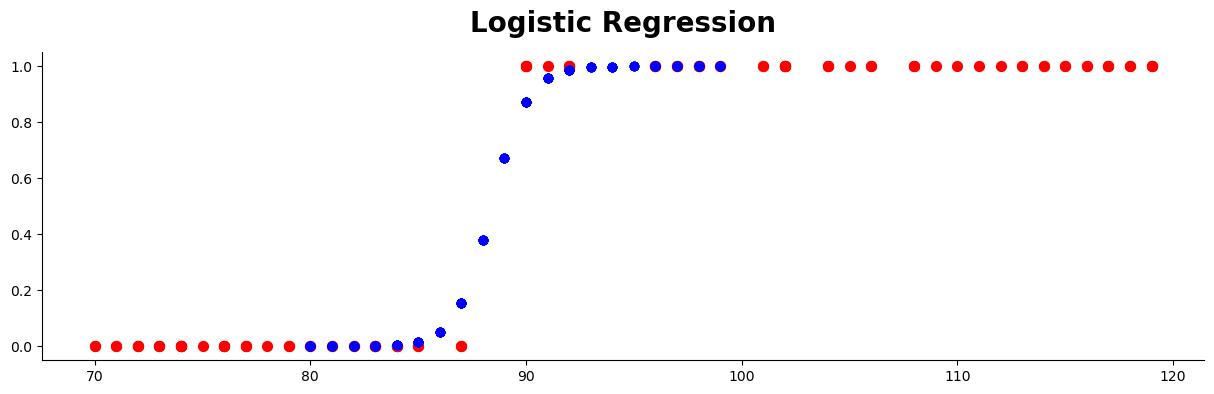

In [147]:
# generate some data to receved some probabilities
generate_weights = np.random.randint(low = 80, high = 100, size = 200, dtype ='int')

plt.figure(figsize = (15, 4))
plt.scatter(data.Weight, data.Obsesity, s = 50, c = 'red')

plt.scatter(generate_weights, sigmoid(m.coef_ * generate_weights + m.intercept_), c = 'blue')

plt.title('Logistic Regression', fontsize = 20, fontweight = 'bold', y = 1.04)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()